## <center>Assignment 1</center>

**Abeysinghe W.A.M.S.Y**   
**190014F**

## 1. Loading the Dataset

In [25]:
import pandas as pd

In [26]:
# Load the dataset
data = pd.read_csv('../housing.csv')
print(data.head())

   Unnamed: 0  Order        PID  MS SubClass MS Zoning  Lot Frontage  \
0           0      1  526301100           20        RL         141.0   
1           1      2  526350040           20        RH          80.0   
2           2      3  526351010           20        RL          81.0   
3           3      4  526353030           20        RL          93.0   
4           4      5  527105010           60        RL          74.0   

   Lot Area Street Alley Lot Shape  ... Pool Area Pool QC  Fence Misc Feature  \
0     31770   Pave   NaN       IR1  ...         0     NaN    NaN          NaN   
1     11622   Pave   NaN       Reg  ...         0     NaN  MnPrv          NaN   
2     14267   Pave   NaN       IR1  ...         0     NaN    NaN         Gar2   
3     11160   Pave   NaN       Reg  ...         0     NaN    NaN          NaN   
4     13830   Pave   NaN       IR1  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type Sale Condition  SalePrice  
0        0     

## 2. Preprocessing

#### 2.1. Removing NaNs

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Select independent features and the target
features = ['Lot Area', 'Garage Yr Blt', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Pool Area']
target = ['SalePrice']

# Remove rows with missing values in target and features.
cleanData = data.dropna(subset= features + target)

X_clean = cleanData[features].to_numpy()
y_clean = cleanData[target].to_numpy()

In [29]:
print(data.shape)
print(cleanData.shape)

(2930, 83)
(2771, 83)


#### 2.2. Plotting Data and Analysing

In [30]:
import numpy as np
import matplotlib.pyplot as plt

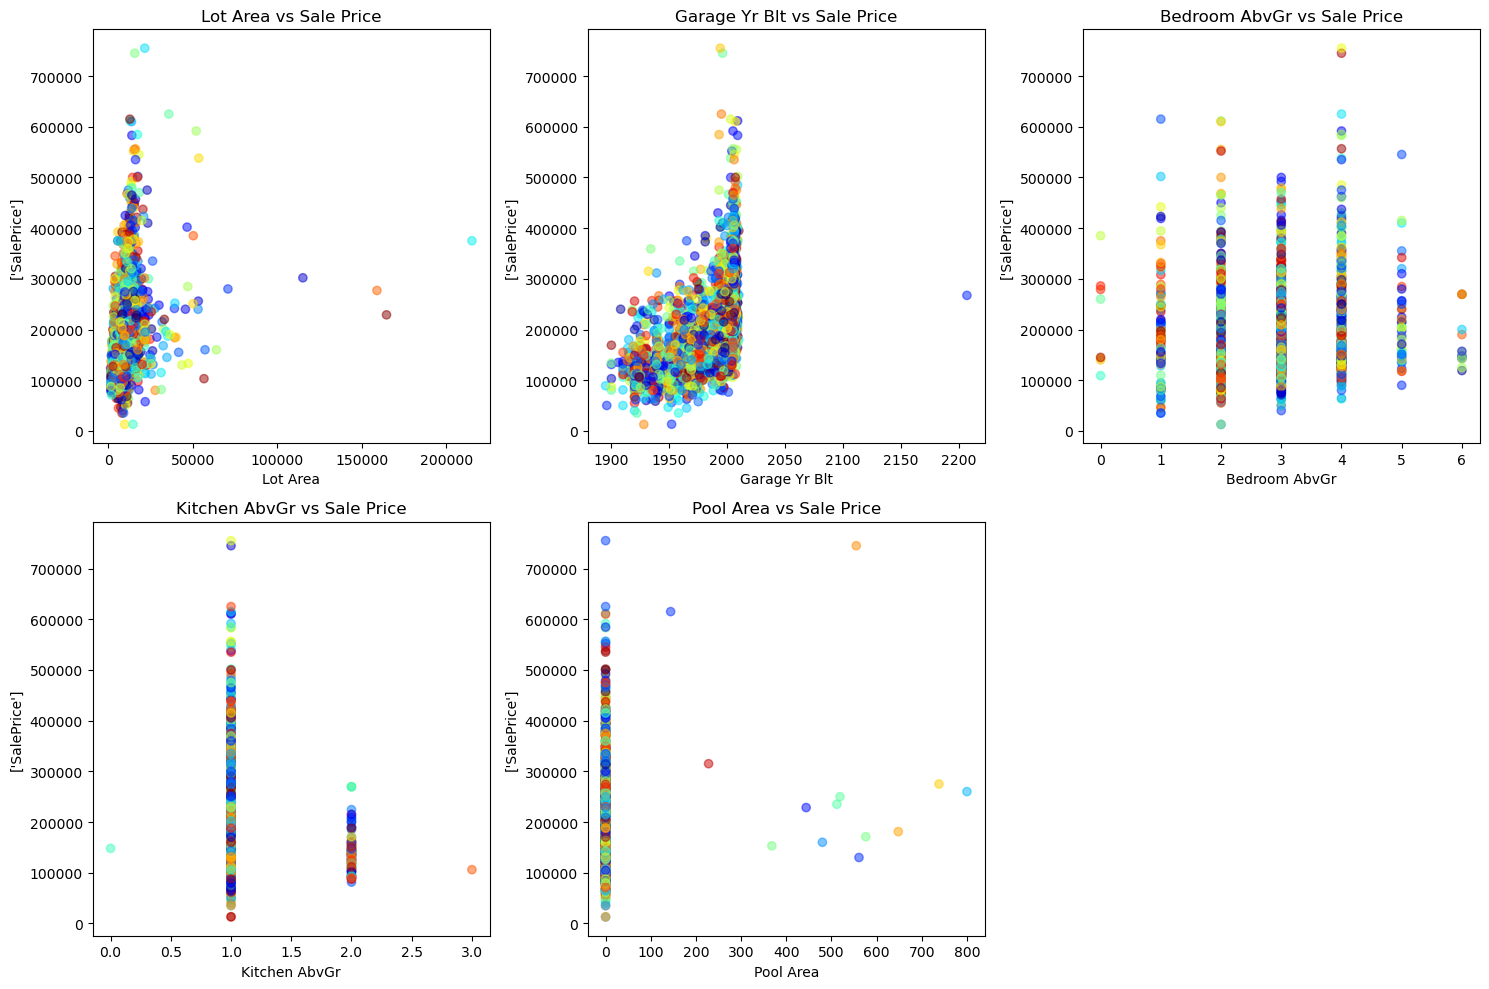

In [31]:
# Plot features vs sale prices
plt.figure(figsize=(15, 10))

# Plot each feature against the sale price
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_clean[:,i], y_clean, alpha=0.5,c= np.random.rand(len(y_clean)),cmap='jet')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title('{} vs Sale Price'.format(feature))

plt.tight_layout()
plt.show()

#### 2.3. Outlier Removal

In [32]:
def outlier_remove(data_set, feature, threshold=3):
  '''
  data_set  - The Used Dataset. Ex- cleanData, data
  feature   - The feature on which outliers are detected
  threshold - No. of stardard deviations considered to the either side of the mean of features.
  '''

  # Mean and standard deviation of the target variable
  mean_ = data_set[feature].mean()
  std_ = data_set[feature].std()

  # lowe and upper bounds according to the threshold.
  lowerBound = mean_ - (threshold * std_)
  upperBound = mean_ + (threshold * std_)

  # Filter data to remove outliers
  data_set = data_set[data_set[feature] >= lowerBound]
  data_filtered = data_set[data_set[feature] <= upperBound]
  return(data_filtered)

**Extreme values can be present in both dependent & independent variables. These extreme values need not necessarily impact the model performance or accuracy, but when they do they are called “Influential” points. Since we might accidentally remove influential points if we do the outlier removal in y-axis, the outliers are only removed in x-axis.**  

**Outliers are removed only for 'Lot Area', 'Garage Yr Blt', 'Bedroom AbvGr'. But doing it on Pool and Kitchen might also help. Adding them removed 8 more data points that might be outliers.**

In [33]:
filteredData = cleanData

for featur in ['Lot Area', 'Garage Yr Blt', 'Bedroom AbvGr']:
  filteredData =   outlier_remove(filteredData,featur,3)

In [34]:
# Extract features and target variable from filtered data
X_filt = filteredData[features].to_numpy()
y_filt = filteredData[target].to_numpy()

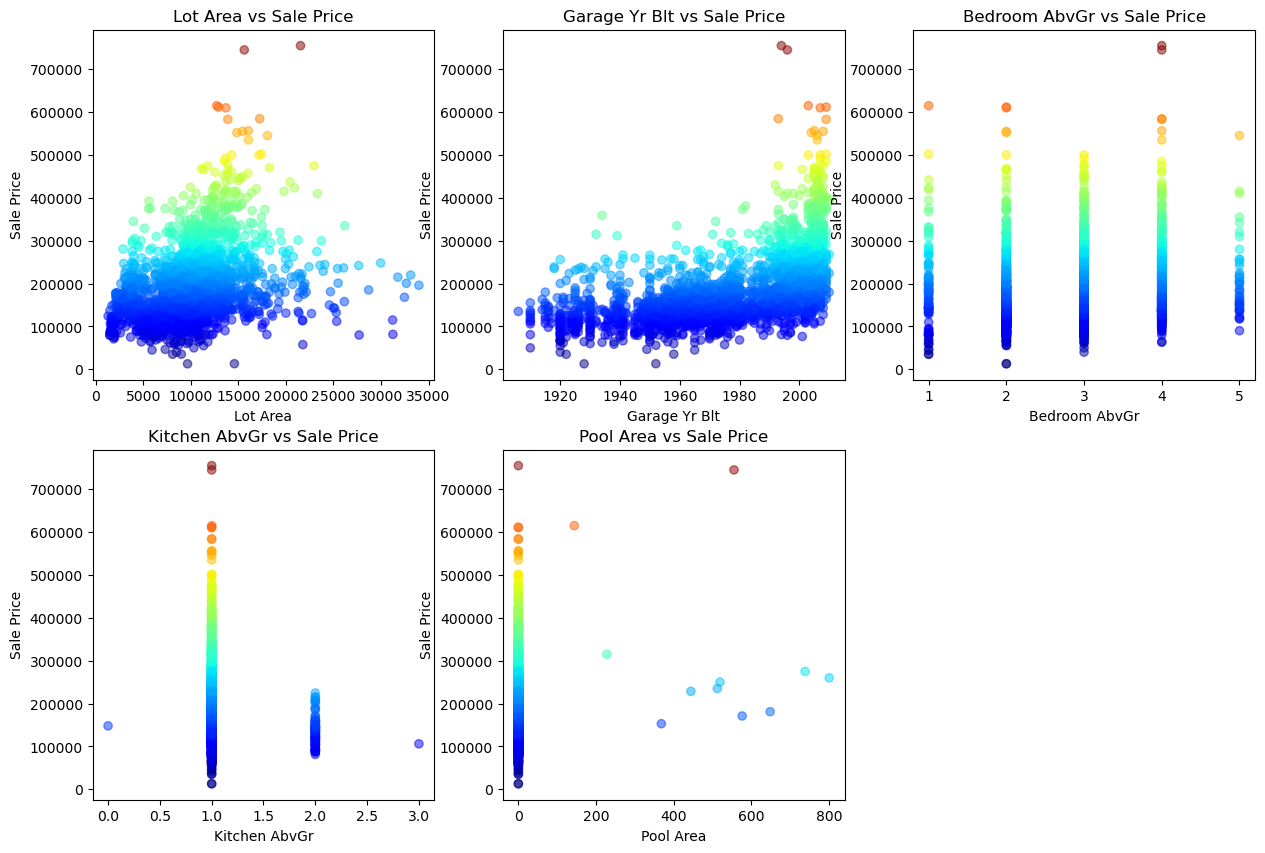

In [35]:
# Plot features vs sale price for the training set
plt.figure(figsize=(15, 10))

# Plot each feature against the sale price
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_filt[:,i], y_filt, alpha=0.5, c=y_filt, cmap='jet')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title('{} vs Sale Price'.format(feature))

#### 2.4. Quantile Trasformation and Normalization

In [36]:
from sklearn.preprocessing import QuantileTransformer

In [37]:
data_quantile_Tf = QuantileTransformer(n_quantiles=10, random_state=0).fit(X_filt)
X_normalized = data_quantile_Tf.transform(X_filt)

## 3. Train Test Split


**The train test split should be done before the outlier detection and the Data Analysis part done below. The reason is to be more closer to what the model can experience in the real world data. In a real world dataset, doing a outlier detection on the test data that we will be recieving after fitting the model might not be practical.**  

**And this also allows us to visulize how the model handles outliers**

**But in this Assignment since the main goal is Data Analysis, all the test and train data are used for Preprocessing**

In [38]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_filt, test_size=0.2, random_state=42)

# 4. Fitting a Model

In [39]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [40]:
# Assuming you have already fitted the linear regression model (regr.fit(X_train, y_train))

# Add a constant column to the feature matrix (required by statsmodels)
X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)


# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train_with_constant).fit()

In [41]:
y_pred = ols_model.predict(X_test_with_constant)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

Root Mean Squared Error (RMSE) on Test Set: 63699.26416696096


# 5. Checking the Corelations

In [42]:
filteredData[features+['SalePrice']].corr()

,Lot Area,Garage Yr Blt,Bedroom AbvGr,Kitchen AbvGr,Pool Area,SalePrice
Lot Area,1.000000,0.040503,0.278710,-0.001369,0.093194,0.357822
Garage Yr Blt,0.040503,1.000000,-0.044902,-0.105017,-0.016791,0.541356
Bedroom AbvGr,0.278710,-0.044902,1.000000,0.149088,0.052532,0.162290
Kitchen AbvGr,-0.001369,-0.105017,0.149088,1.000000,-0.010201,-0.105273
Pool Area,0.093194,-0.016791,0.052532,-0.010201,1.000000,0.080755
SalePrice,0.357822,0.541356,0.162290,-0.105273,0.080755,1.000000


In [43]:
# Get summary statistics of the model
summary = ols_model.summary()

# Extract p-values from the summary for all features
p_values = summary.tables[1].data[1:]

# Create a DataFrame to associate p-values with feature names
p_values_df = pd.DataFrame(p_values, columns=['Feature', 'Coefficient', 'Standard Error', 't-value', 'P-Value', 'Lower CI', 'Upper CI'])
p_values_df['P-Value'] = p_values_df['P-Value'].astype(float)


print(summary)
print(p_values_df)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     430.9
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          1.54e-321
Time:                        23:31:22   Log-Likelihood:                -26753.
No. Observations:                2172   AIC:                         5.352e+04
Df Residuals:                    2166   BIC:                         5.355e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.667e+04   8561.377      8.955      0.0